In [1]:
import matplotlib.pyplot as plt

from p2_release import *
import scipy.linalg as la

Reading ORL faces database
Data preprocessing


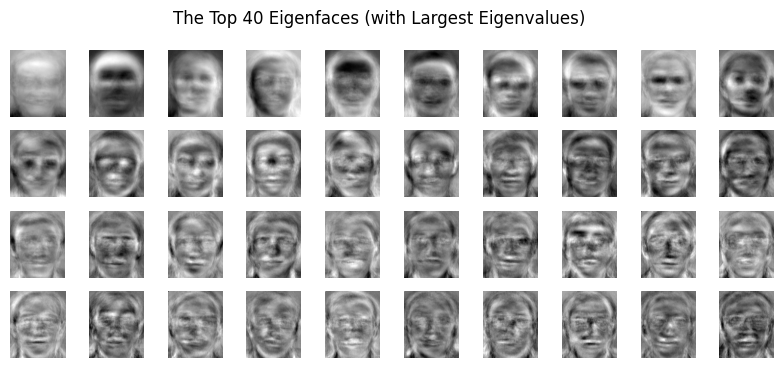

In [2]:
X_mean = np.mean(X_processed, axis=1)
X_centered = X_processed - X_mean
U, S, Vt = la.svd(X_centered, full_matrices=False)

# Top 40 eigen face
plt.figure(figsize=(10, 4))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(U[:, i].reshape(img_size), cmap='gray')
    plt.axis('off')
plt.suptitle("The Top 40 Eigenfaces (with Largest Eigenvalues)")
plt.show()

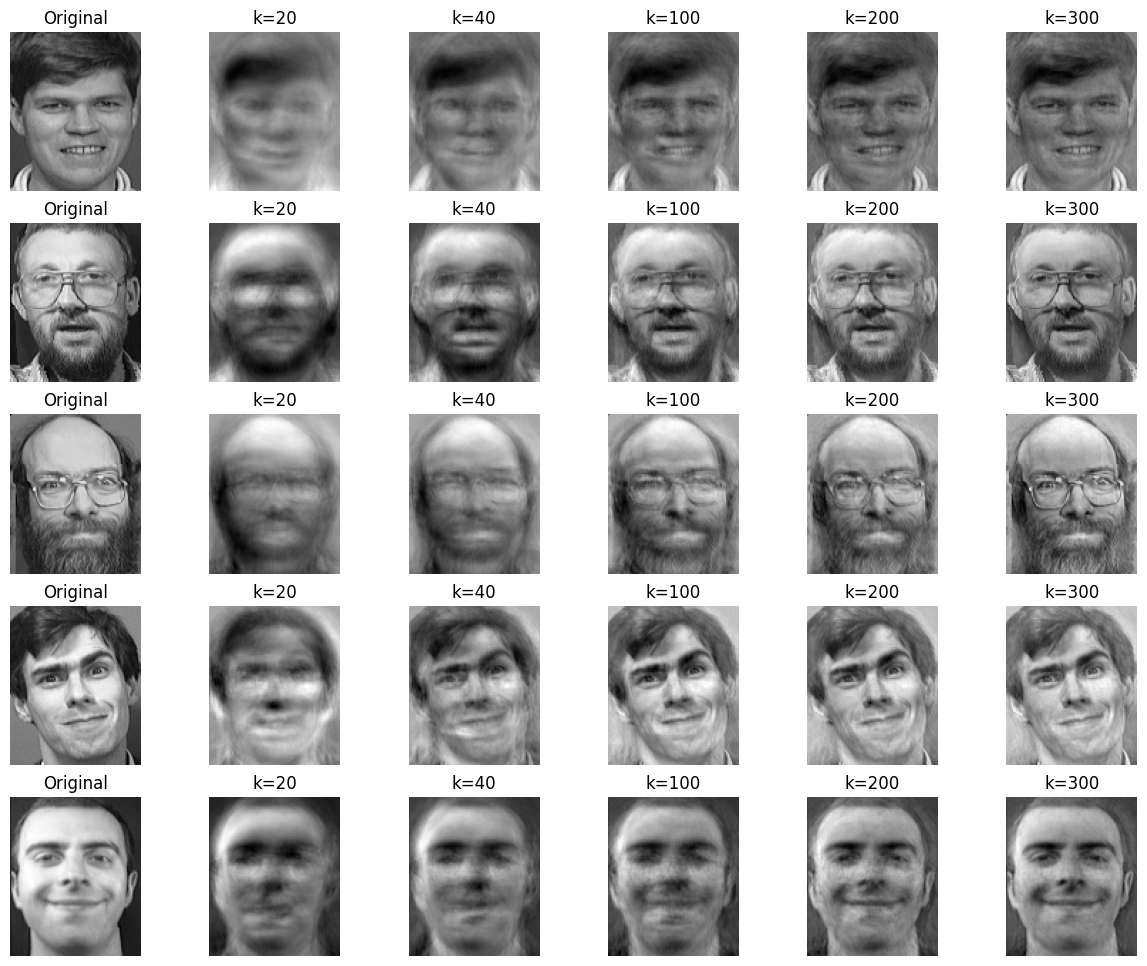

In [3]:
# Choose 5 random images to reconstruct
indices = np.random.choice(400, 5, replace=False)
original_images = X_processed[:, indices]

# Define k values to test
k_values = [20, 40, 100, 200, 300]

# Plot a 5x6 figure
fig, axes = plt.subplots(5, 6, figsize=(15, 12))
for i, idx in enumerate(indices):
    axes[i, 0].imshow(X_processed[:, idx].reshape(img_size), cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')
    
    for j, k in enumerate(k_values):
        # Reconstruct the image using the first k eigenfaces
        X_recon = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
        axes[i, j+1].imshow(X_recon[:, idx].reshape(img_size), cmap='gray')
        axes[i, j+1].set_title(f'k={k}')
        axes[i, j+1].axis('off')

plt.show()

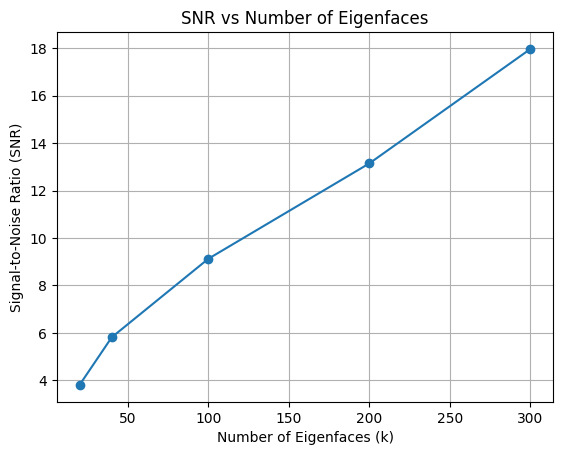

In [4]:
# Assuming U, S, Vt are from the SVD of X_centered and k_values is defined
snr_values = []
for k in k_values:
    # Reconstruct the image matrix using the first k eigenfaces
    X_recon = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    
    # Calculate SNR for the entire reconstructed matrix
    snr = cal_snr(X_centered, X_recon)
    snr_values.append(snr)

# Plot SNR
plt.plot(k_values, snr_values, marker='o')
plt.xlabel('Number of Eigenfaces (k)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR vs Number of Eigenfaces')
plt.grid(True)
plt.show()